# Zajecie 6

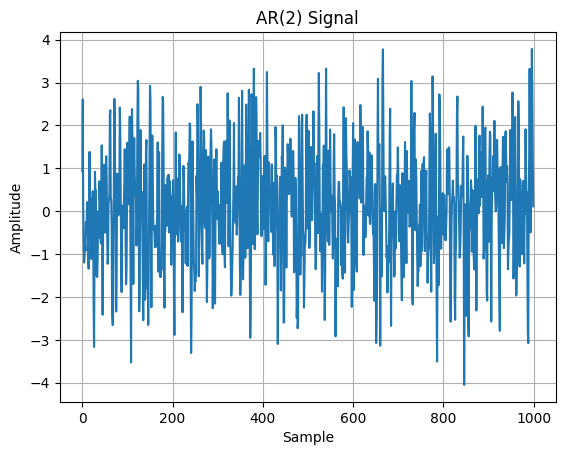

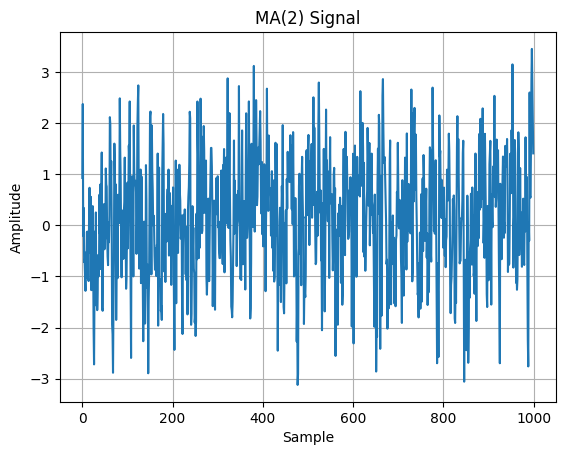

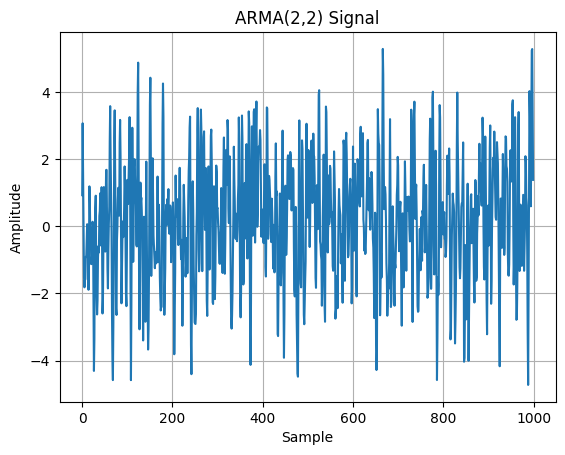

Estimated AR Coefficients: [-0.72704487  0.45640487]
Estimated Noise Variance: 0.9919233546562017


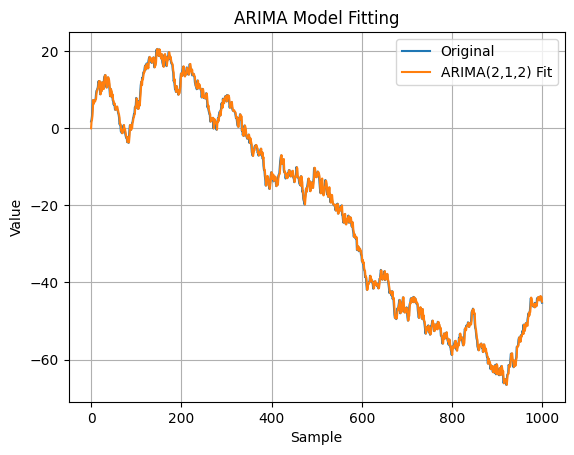

In [6]:
#1. Simulating an AR(2) Process

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

N = 1000
w = np.random.normal(0, 1, N)
a = [1, -0.75, 0.5]  # AR coefficients
ar_signal = lfilter([1], a, w)

plt.plot(ar_signal)
plt.title("AR(2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

#2. Simulating an MA(2) Process

b = [1.0, 0.5, 0.25]  # MA coefficients
ma_signal = lfilter(b, [1], w)

plt.plot(ma_signal)
plt.title("MA(2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

#3. Simulating an ARMA(2,2) Process

a = [1, -0.75, 0.5]
b = [1.0, 0.5, 0.25]
arma_signal = lfilter(b, a, w)

plt.plot(arma_signal)
plt.title("ARMA(2,2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


#4. Estimating AR Model Parameters (Yule-Walker)

from statsmodels.regression.linear_model import yule_walker

rho, sigma = yule_walker(ar_signal, order=2)
print("Estimated AR Coefficients:", -rho)
print("Estimated Noise Variance:", sigma)


#5. ARIMA Modeling


import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate non-stationary signal: a trend + noise
N = 1000
np.random.seed(0)
trend = np.cumsum(np.random.normal(0, 1, N))

# Fit ARIMA(p=2, d=1, q=2)
model = ARIMA(trend, order=(2, 1, 2))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.predict(start=0, end=N-1)

plt.plot(trend, label="Original")
plt.plot(forecast, label="ARIMA(2,1,2) Fit")
plt.legend()
plt.title("ARIMA Model Fitting")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.show()



## Comparison Example: ARMA vs ARIMA

To demonstrate the difference between ARMA and ARIMA modeling approaches, consider a signal with a clear trend component. An ARMA model assumes stationarity and may not perform well without preprocessing (e.g., detrending), while an ARIMA model can inherently handle such trends through differencing.


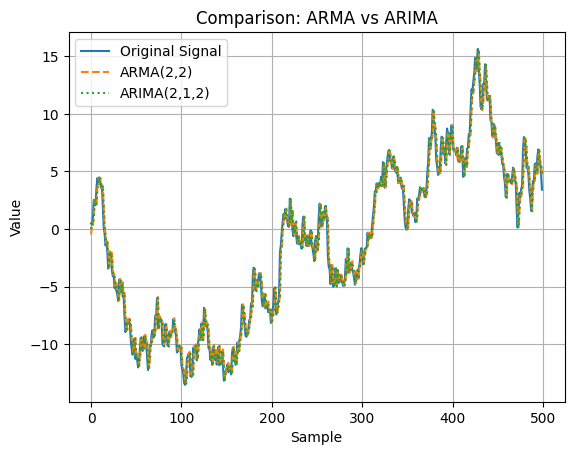

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

# Create a non-stationary signal with a linear trend
N = 500
np.random.seed(42)
trend = np.cumsum(np.random.normal(0, 1, N))

# Fit ARMA(2,2) model to non-stationary signal
arma_model = ARIMA(trend, order=(2, 0, 2))
arma_result = arma_model.fit()
arma_pred = arma_result.predict(start=0, end=N-1)

# Fit ARIMA(2,1,2) model
arima_model = ARIMA(trend, order=(2, 1, 2))
arima_result = arima_model.fit()
arima_pred = arima_result.predict(start=0, end=N-1)

# Plotting
plt.plot(trend, label="Original Signal")
plt.plot(arma_pred, label="ARMA(2,2)", linestyle='--')
plt.plot(arima_pred, label="ARIMA(2,1,2)", linestyle=':')
plt.title("Comparison: ARMA vs ARIMA")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


This example illustrates that ARIMA models better capture trends by incorporating differencing, while ARMA models may yield biased or poor fits unless the signal is preprocessed to be stationary.


11. Simulate a cumulative sum of white noise. Fit ARIMA(1,1,0) and ARIMA(1,1,1).
Compare forecasts.


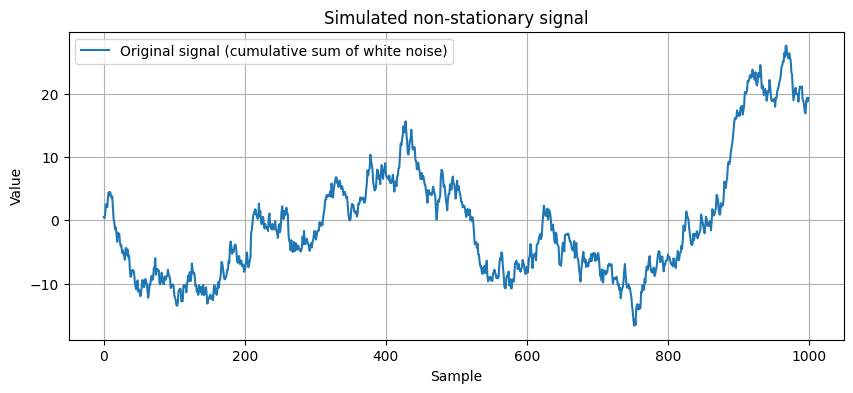

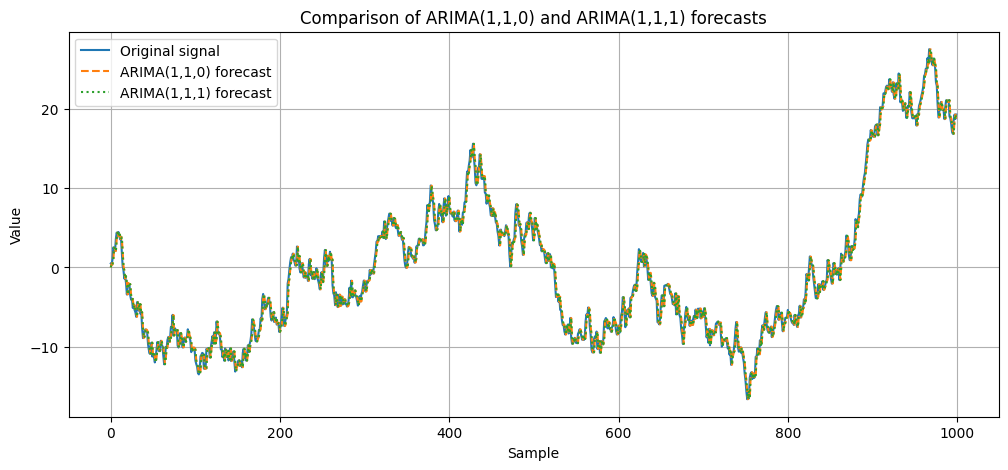

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. Symulacja sygnału: suma skumulowana białego szumu (random walk)
N = 1000
np.random.seed(42)  # dla powtarzalności wyników
white_noise = np.random.normal(0, 1, N)
signal = np.cumsum(white_noise)  # cumulative sum = niestacjonarny sygnał

plt.figure(figsize=(10,4))
plt.plot(signal, label="Original signal (cumulative sum of white noise)")
plt.title("Simulated non-stationary signal")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

# 2. Dopasowanie modelu ARIMA(1,1,0)
model_110 = ARIMA(signal, order=(1,1,0))
fit_110 = model_110.fit()
forecast_110 = fit_110.predict(start=0, end=N-1)

# 3. Dopasowanie modelu ARIMA(1,1,1)
model_111 = ARIMA(signal, order=(1,1,1))
fit_111 = model_111.fit()
forecast_111 = fit_111.predict(start=0, end=N-1)

# 4. Porównanie prognoz na wykresie
plt.figure(figsize=(12,5))
plt.plot(signal, label="Original signal")
plt.plot(forecast_110, label="ARIMA(1,1,0) forecast", linestyle='--')
plt.plot(forecast_111, label="ARIMA(1,1,1) forecast", linestyle=':')
plt.title("Comparison of ARIMA(1,1,0) and ARIMA(1,1,1) forecasts")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
